weight [[-0.717  0.382 -0.233  0.567]
 [-0.302 -0.237 -1.21   1.749]
 [ 2.787 -2.853  3.429 -3.363]
 [-4.564  3.987  3.641 -3.063]]
bias [[-0.139]
 [ 0.651]
 [-0.552]
 [ 0.041]]
训练集分类错误个数： 0
测试集分类错误个数： 0


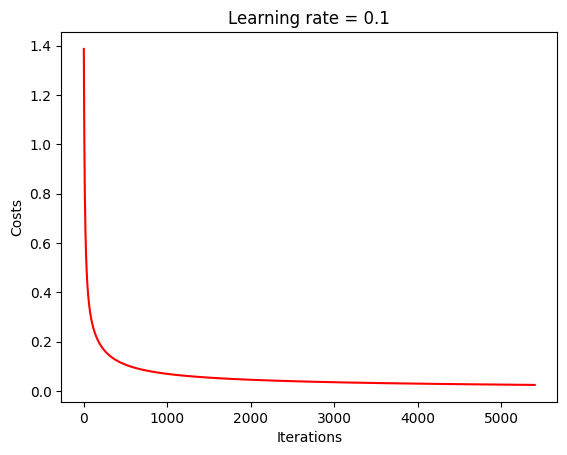

In [6]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df=pandas.read_csv('wheelchair_dataset.csv')
data=np.array(df,dtype=float)

m_all=np.shape(data)[0]
d=np.shape(data)[1]-1
m_train=200
m_test=m_all-m_train
learning_rate=0.1
iteration=5400
rng=np.random.default_rng(1)
rng.shuffle(data)

c=int(np.amax(data[:,d]))
w=np.zeros((d,c),dtype='float')
v=np.ones((1,m_train))
b=np.zeros((c,1))
cost_saved=[]

x_mean=np.mean(data[:m_train,:d],axis=0)
x_std=np.std(data[:m_train,:d],axis=0,ddof=1)
data[:,:d]=(data[:,:d]-x_mean)/x_std


x_train=data[:m_train,:d].T
y_train=data[:m_train,d].reshape(1,-1)
y_train_copy=np.array(y_train,dtype=int)
x_test=data[m_train:,:d].T
y_test=data[m_train:,d].T
one_hot=np.zeros((c,m_train))
one_hot[y_train_copy-1,np.arange(m_train)]=1

for i in range (iteration):
    z=np.dot(w.T,x_train)+b
    y_hat=np.exp(z)/np.sum(np.exp(z),axis=0)
    '''np.sum(np.exp(z))是错的，这样求出的和是所有数的求和，是一个数值
        不写axis=0不能看成默认是0'''
    e=y_hat-one_hot
    cost=-np.trace(np.dot(one_hot.T,np.log(y_hat)))/m_train
    w=w-learning_rate*np.dot(x_train,e.T)/m_train
    b=b-learning_rate*np.dot(e,v.T)/m_train
    cost_saved.append(cost)

print('weight',np.array2string(w,precision=3))
print('bias',np.array2string(b,precision=3))

y_train_hat=np.argmax(y_hat,axis=0)+1
print('训练集分类错误个数：',np.sum(y_train_hat!=y_train))
y_test_hat=np.argmax(np.dot(w.T,x_test)+b,axis=0)+1
print('测试集分类错误个数：',np.sum(y_test_hat!=y_test))

plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Learning rate = ' + str(learning_rate))
plt.plot(range(1,len(cost_saved)+1),cost_saved,'r')
plt.show()
